<a href="https://colab.research.google.com/github/yasmin26n/Komputasi-Intelegensia/blob/main/UAS_KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UAS KOMPUTASI INTELEGENSIA


Nama : Yasmin Nashwa Alifya

NPM : 2106725040

In [ ]:
#Import library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
#Membuat dataframe untuk dataset train and test
train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

In [ ]:
#Explore data train
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Konversi dataframe menjadi array numpy
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [ ]:
#Mengubah skala data
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [ ]:
#Membagi data menjadi data validasi dan pelatihan
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

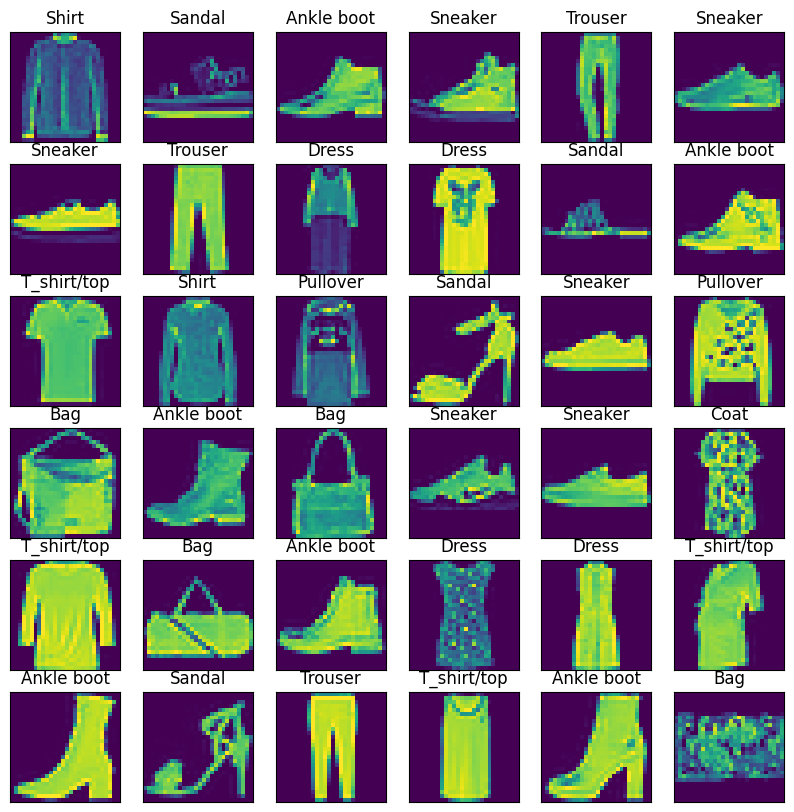

In [ ]:
#Visualisasi sampel
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

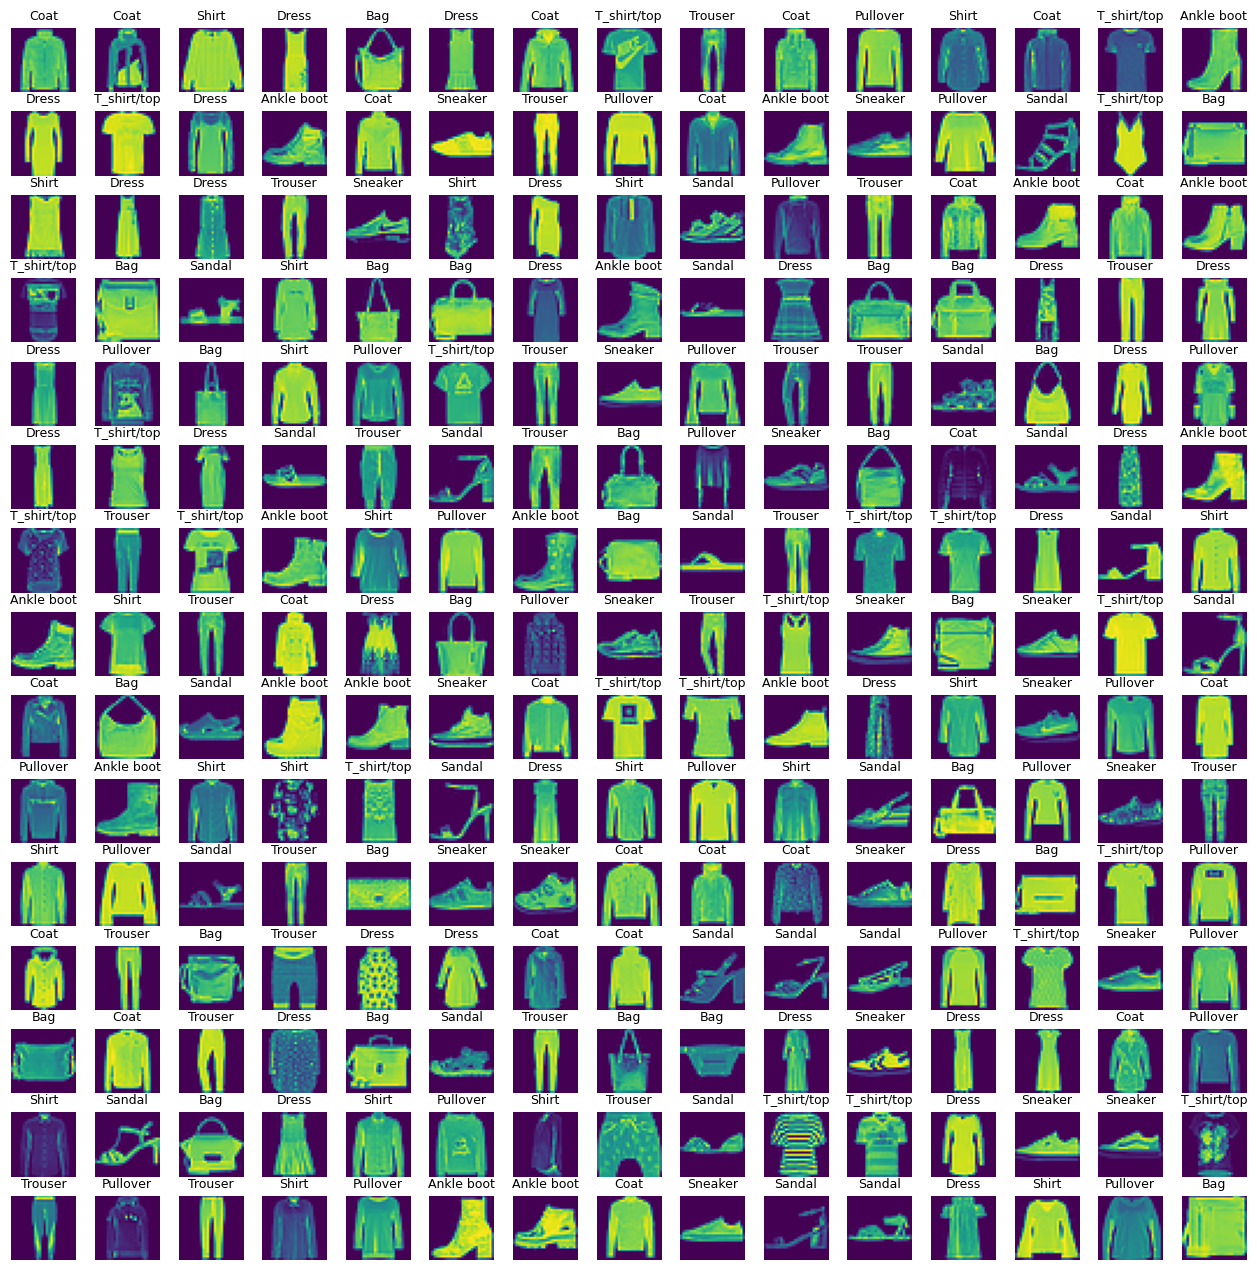

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [ ]:
#Menentukan bentuk dari gambar
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [ ]:
#Melakukan formatting data
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [ ]:
#Pendefinisian model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

In [ ]:
#Pelatihan Model
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 481ms/step - accuracy: 0.3417 - loss: 2.0159 - val_accuracy: 0.7069 - val_loss: 1.1312
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7241 - loss: 0.9846 - val_accuracy: 0.7644 - val_loss: 0.6973
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7651 - loss: 0.6718 - val_accuracy: 0.7829 - val_loss: 0.5941
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7883 - loss: 0.5814 - val_accuracy: 0.8073 - val_loss: 0.5294
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8138 - loss: 0.5262 - val_accuracy: 0.8303 - val_loss: 0.4860
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8279 - loss: 0.4902 - val_accuracy: 0.8371 - val_loss: 0.4600
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8376 - loss: 0.4616 - val_accuracy: 0.8488 - val_loss: 0.4386
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8441 - loss: 0.4423 - val_accuracy: 0.8536 - 

Text(0.5, 1.0, 'Train - Accuracy')

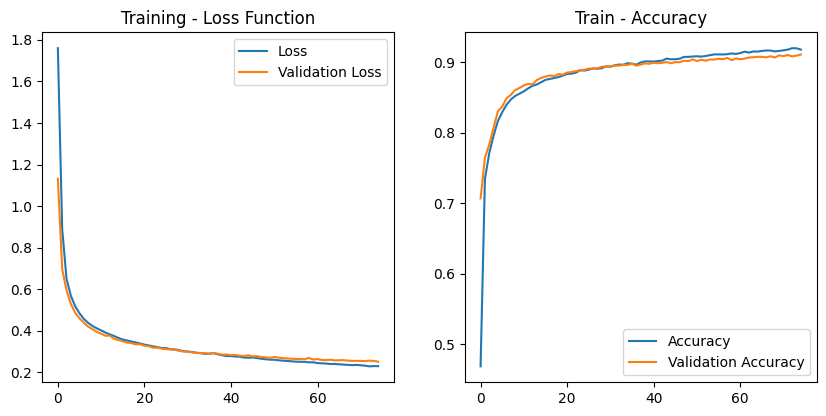

In [ ]:
#Evaluasi model
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2519
Test Accuracy : 0.9102


In [ ]:
#Menyimpan model
cnn_model.save('fashion_classifier.h5')

In [ ]:
#Metrix Evaluasi
import numpy as np
from sklearn.metrics import classification_report

predicted_probabilities = cnn_model.predict(x_test)  # Dapatkan probabilitas prediksi untuk setiap kelas
predicted_classes = np.argmax(predicted_probabilities, axis=1)  # Dapatkan kelas dengan probabilitas tertinggi

# Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

#Mendefinisikan num_classes sebelum menggunakannya
num_classes = 10  # Ganti dengan jumlah kelas yang sesuai jika berbeda
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.87      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.87      0.86      0.87      1000
     Class 3       0.90      0.93      0.92      1000
     Class 4       0.89      0.86      0.87      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.75      0.72      0.74      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Metrix Evaluasi

predicted_probabilities = cnn_model.predict(x_test)  # Dapatkan probabilitas prediksi untuk setiap kelas
predicted_classes = np.argmax(predicted_probabilities, axis=1)  # Dapatkan kelas dengan probabilitas tertinggi

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, predicted_classes, average='macro')
recall = recall_score(y_true, predicted_classes, average='macro')
f1 = f1_score(y_true, predicted_classes, average='macro')

print(f"Overall Precision: {precision}")
print(f"Overall Recall: {recall}")
print(f"Overall F1-score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Overall Precision: 0.9162857946171176
Overall Recall: 0.9169
Overall F1-score: 0.9160116542392768


Prediksi Kelas

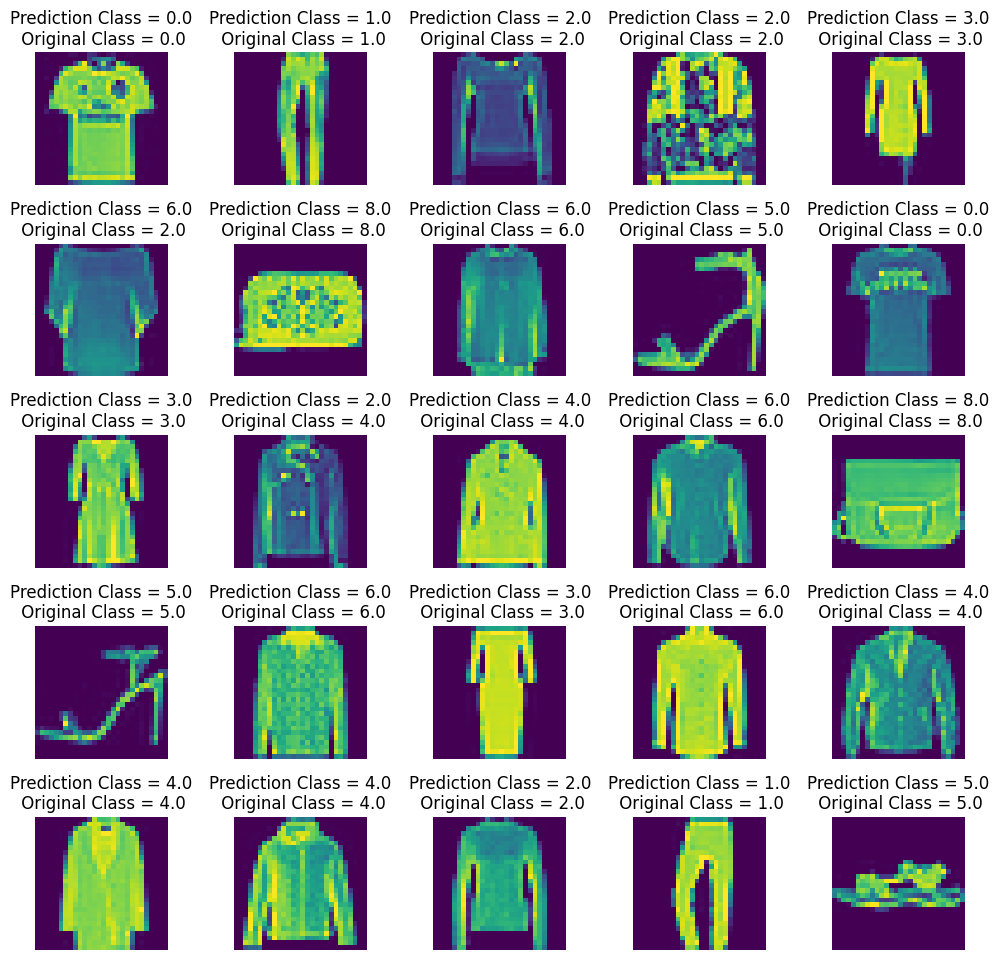

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

## IMPROVE SECTION

In [ ]:
#Pelatihan model dengan epoch 100
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9194 - loss: 0.2264 - val_accuracy: 0.9099 - val_loss: 0.2506
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9183 - loss: 0.2273 - val_accuracy: 0.9093 - val_loss: 0.2535
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9239 - loss: 0.2171 - val_accuracy: 0.9109 - val_loss: 0.2493
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9210 - loss: 0.2202 - val_accuracy: 0.9111 - val_loss: 0.2491
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9199 - loss: 0.2202 - val_accuracy: 0.9110 - val_loss: 0.2486
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9212 - loss: 0.2222 - val_accuracy: 0.9122 - val_loss: 0.2482
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9231 - loss: 0.2162 - val_accuracy: 0.9121 - val_loss: 0.2476
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9216 - loss: 0.2166 - val_accuracy: 0.

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2404
Test Accuracy : 0.9169


In [ ]:
#Menambahkan MAE dan MAPE sebagai evaluasi metriks
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, predicted_classes)
mape = mean_absolute_percentage_error(y_test, predicted_classes)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.3139
Mean Absolute Percentage Error (MAPE): 308496574474879.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


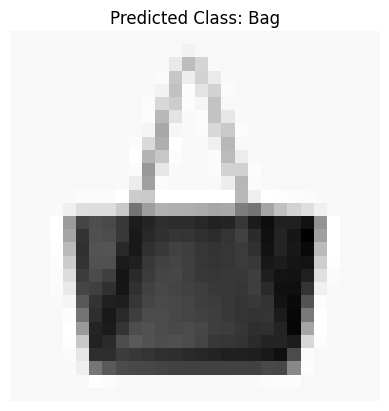

In [ ]:
#Fungsi Penerapan Model
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('fashion_classifier.h5')

# Function to preprocess a new image
def preprocess_image(image_path):
    from PIL import Image
    import cv2
    img = Image.open(image_path).convert('L') # Convert to grayscale
    img = img.resize((28, 28)) # Resize to 28x28
    img_array = np.array(img) / 255.0 # Normalize pixel values
    img_array = img_array.reshape(1, 28, 28, 1) # Reshape for the model
    return img_array

# Example usage:
image_path = '/content/bag.jpg'  # Replace with the actual path to your image
try:
    preprocessed_image = preprocess_image(image_path)
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)

    # Display the image and the predicted class
    class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.imshow(preprocessed_image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")